<div style="color:#485053;
           display:fill;
           border-radius:0px;
           background-color:#86C2DE;
           font-size:200%;
           padding-left:40px; 
           font-family:Verdana;
           font-weight:600; 
           letter-spacing:0.5px;
           ">

<p style="padding: 15px;
          color:white;
          text-align: center;">

 Activity 3-Image Classifier
</p>
</div> 

**About the data:**
* This dataset here contains two classes majorly being defective and non-defective PCB. This dataset can be used to realize the defective PCB of the same PCB type. An image classier to detect the defected PCB to be implemented. This dataset will help to detect defects that may escape the human eye.
* The defects were manually made on PCBs for the sake of collecting enough required data.

<div style="color:#485053;
           display:fill;
           border-radius:0px;
           background-color:#C2C4E2;
           font-size:200%;
           padding-left:40px; 
           font-family:Verdana;
           font-weight:600; 
           letter-spacing:0.5px;
           ">

<p style="padding: 15px;
          color:white;
          text-align: center;">

 LIBRARIES
</p>
</div> 

Here are the list of necessary libraries which we will use to classify PCB into two classes, defected PCB and non-defect PCB.

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import seaborn as sns
import pandas as pd

<div style="color:#485053;
           display:fill;
           border-radius:0px;
           background-color:#C2C4E2;
           font-size:200%;
           padding-left:40px; 
           font-family:Verdana;
           font-weight:600; 
           letter-spacing:0.5px;
           ">

<p style="padding: 15px;
          color:white;
          text-align: center;">

 LOADING IMAGE DATA
</p>
</div>

In [32]:
import cv2
dir='../input/pcb-reduced/archive (5)/dataset/tobeaugmented'
categories =['defected','non-defect']  #As there are two folders in the dataset
pcb=[]

for i in categories:
    path=os.path.join(dir,i)
    label=categories.index(i)
    for img in os.listdir(path):
        imgpath=os.path.join(path,img)
        pcb_img=cv2.imread(imgpath)     
        gray = cv2.cvtColor(pcb_img, cv2.COLOR_BGR2GRAY)  #gray scale
        gray=cv2.resize(gray,(50,50))  #EXTRACTING THE FEATURES
        image=np.array(gray).flatten()       
        pcb.append([image,label])
        
features=[]
labels=[]
random.shuffle(pcb)        
#0=defected, 1=non-defect        

## **Original Image from file directory**

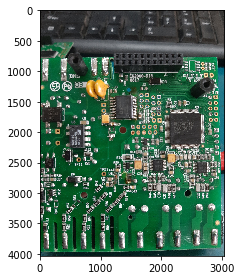

In [35]:
from skimage.io import imread, imshow
image1 = imread('../input/pcb-reduced/archive (5)/dataset/tobeaugmented/defected/20200707_170152.jpg')
imshow(image1);

## **Gray Scale Image**

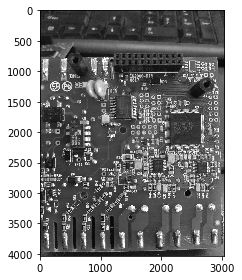

In [88]:
from skimage.io import imread, imshow
image2 = imread('../input/pcb-reduced/archive (5)/dataset/tobeaugmented/defected/20200707_170152.jpg',as_gray=True)
image3 = imread('../input/pcb-reduced/archive (5)/dataset/tobeaugmented/non-defect/20200702_101154.jpg', as_gray=True)
imshow(image2);

In [38]:
#Shape of images
print("Shape of RGB Image :",image1.shape)
print("shape of gray scale Image :",image2.shape)

Shape of RGB Image : (4032, 3024, 3)
shape of gray scale Image : (4032, 3024)


# Feature Extraction
Feature extraction is a process of dimensionality reduction by which an initial set of raw data is reduced to more manageable groups for processing. A characteristic of these large data sets is a large number of variables that require a lot of computing resources to process. Feature extraction is the name for methods that select and /or combine variables into features, effectively reducing the amount of data that must be processed, while still accurately and completely describing the original data set.

## 1. Pixel Features

In [44]:
pixel_feat1 = np.reshape(image2, (3024 * 4032))
pixel_feat1

array([0.16794902, 0.17776431, 0.16375961, ..., 0.51154157, 0.5199502 ,
       0.51602863])

## 2. median

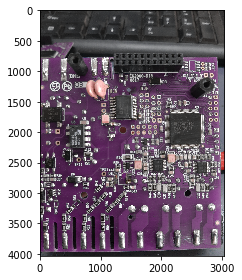

In [66]:
from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import median
med = median(image1)
imshow(med);

## **3. Gaussian filter**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  
/opt/conda/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


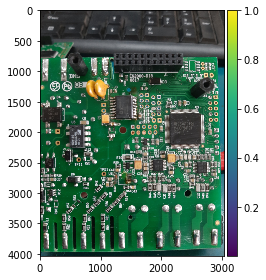

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import filters
from skimage import restoration
gaussian_filter_coins = filters.gaussian(image1, sigma=2)
imshow(gaussian_filter_coins)

## 4. **TV chambolle filter**

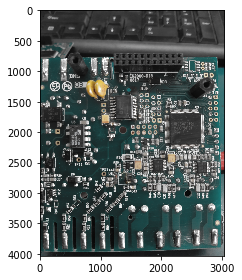

In [75]:
tv_filter_coins = restoration.denoise_tv_chambolle(image1, weight=0.1)
imshow(tv_filter_coins)

## **5. Bilateral Filter**

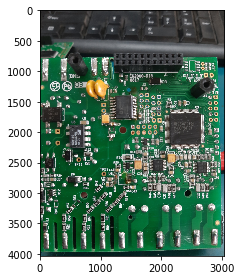

In [77]:
blur = cv2.bilateralFilter(image1,9,75,75)
imshow(blur)

## **Image to Numpy**

In [45]:
for f,l in pcb:
    features.append(f)
    labels.append(l)
print(features[1])     #converted the image into numpy array 

[ 16  12   9 ... 135  96  92]


The image is converted to numpy array

<div style="color:#485053;
           display:fill;
           border-radius:0px;
           background-color:#C2C4E2;
           font-size:200%;
           padding-left:40px; 
           font-family:Verdana;
           font-weight:600; 
           letter-spacing:0.5px;
           ">

<p style="padding: 15px;
          color:white;
          text-align: center;">

DATA VISUALISATION
</p>
</div>

In [79]:
df=pd.DataFrame(pcb)
print(df.shape)
defected_dc=len(df[df[1]==0])
nc=len(df[df[1]==1])

(22, 2)


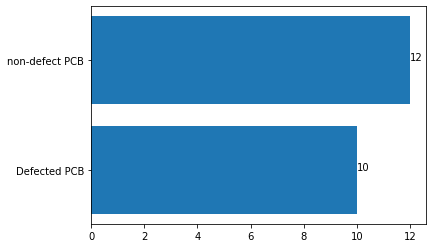

In [80]:
x = ["Defected PCB","non-defect PCB"]
y = [defected_dc,nc]
plt.barh(x, y)
for index, value in enumerate(y):
    plt.text(value, index, str(value))

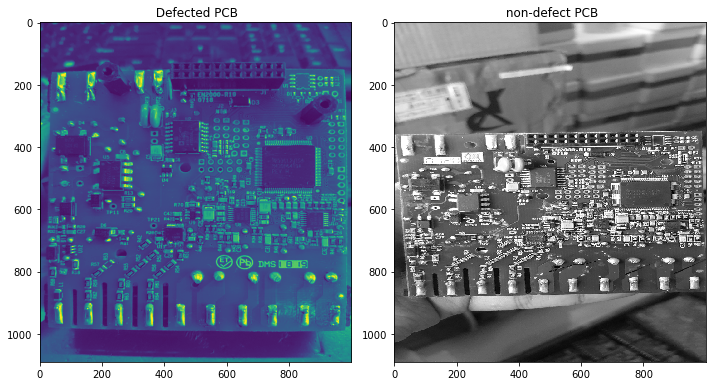

In [105]:
import matplotlib.image as mpimg
from skimage.io import imread, imshow
b=imread('../input/pcb-reduced/archive (5)/dataset/tobeaugmented/non-defect/20200702_100958.jpg', as_gray=True)
a=imread('../input/pcb-reduced/archive (5)/dataset/tobeaugmented/defected/20200707_170501.jpg', as_gray=True)
img = mpimg.imread('../input/pcb-reduced/archive (5)/dataset/tobeaugmented/defected/20200707_170501.jpg')
img1=mpimg.imread('../input/pcb-reduced/archive (5)/dataset/tobeaugmented/non-defect/20200702_100958.jpg')
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
y=cv2.resize(a, (1000,1090))
imshow(y)
plt.title(" Defected PCB")

plt.subplot(1, 2, 2)
x=cv2.resize(b, (1000,1090))
imshow(x)
plt.title(" non-defect PCB")
plt.show()

In [86]:
print(features)

[array([ 56,  40,  78, ..., 117, 119, 127], dtype=uint8), array([ 16,  12,   9, ..., 135,  96,  92], dtype=uint8), array([49, 74, 46, ..., 64, 28, 62], dtype=uint8), array([ 19,  21,  22, ...,  86,  94, 102], dtype=uint8), array([172, 168, 161, ...,  20,  25,  18], dtype=uint8), array([133, 160, 141, ..., 148, 172, 166], dtype=uint8), array([150, 170, 184, ..., 138, 140, 136], dtype=uint8), array([ 35,  37,  41, ..., 114, 117, 119], dtype=uint8), array([166,  70,  67, ..., 143, 144, 145], dtype=uint8), array([ 39,  37,  49, ..., 101,  99, 101], dtype=uint8), array([111, 255, 255, ..., 153, 153, 151], dtype=uint8), array([178, 184, 184, ...,  34,  54,  31], dtype=uint8), array([150, 152, 152, ..., 141, 156, 167], dtype=uint8), array([120, 123, 123, ..., 161, 162, 164], dtype=uint8), array([ 32,  35,  33, ..., 109, 119, 106], dtype=uint8), array([168, 172, 178, ...,  82,  62,  56], dtype=uint8), array([100, 113, 138, ..., 102, 105, 106], dtype=uint8), array([ 43,  32,  26, ..., 113, 118,

<div style="color:#485053;
           display:fill;
           border-radius:0px;
           background-color:#C2C4E2;
           font-size:200%;
           padding-left:40px; 
           font-family:Verdana;
           font-weight:600; 
           letter-spacing:0.5px;
           ">

<p style="padding: 15px;
          color:white;
          text-align: center;">

SPLIT DATA
</p>
</div>

* We will keep the test size of data 0.25 

In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(features,labels,test_size=0.3)

# Model Building using SVM(SUPPORT VECTOR MACHINE)

In [15]:
model=SVC(C=1,kernel='poly',gamma='auto')
model.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
accuracy=model.score(xtest,ytest)
print('Accuracy :','%.2f'%accuracy)

Accuracy : 0.86


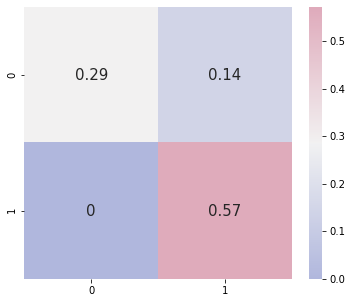

In [16]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(6,5))
cf_matrix = confusion_matrix(ytest, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})
CM=cf_matrix

In [17]:
#calculate specificity,sensitivity, precision and recall
SENSITIVITY = CM[1, 1] / (CM[1, 1] + CM[1, 0])
specificity1 = CM[0, 0] / (CM[0, 0] + CM[0, 1])
PRECISION = CM[1, 1] / (CM[1, 1] + CM[0, 1])
recall = CM[1, 1] / (CM[1, 1] + CM[1, 0])
print("Sensitivity :",SENSITIVITY)
print("Specificity :",'%.2f'%specificity1)
print("Precision :",'%.2f'%PRECISION)
print("Recall :",recall)

Sensitivity : 1.0
Specificity : 0.67
Precision : 0.80
Recall : 1.0


In [18]:
y_pred_gnb=model.predict(xtest)
f1 = f1_score(ytest, y_pred_gnb, zero_division=1)
print("F1-Score :", '%.2f'%(f1*100),"%")    

F1-Score : 88.89 %
